## Homework by Teslim Olayiwola

In [1]:
%load_ext autoreload
%autoreload 2

### Q1. Install MLflow

To get started with MLflow you'll need to install the MLflow Python package.

For this we recommend creating a separate Python environment, for example, you can use conda environments, and then install the package there with pip or conda.

Once you installed the package, run the command `mlflow --version` and check the output.

What's the version that you have?

In [2]:
import mlflow

mlflow.__version__

'2.12.2'

### Q2

We'll use the Green Taxi Trip Records dataset to predict the duration of each trip.

Download the data for January, February and March 2023 in parquet format from here.

Use the script preprocess_data.py located in the folder homework to preprocess the data.

The script will:

load the data from the folder `<TAXI_DATA_FOLDER>` (the folder where you have downloaded the data),
fit a DictVectorizer on the training set (January 2023 data),
save the preprocessed datasets and the DictVectorizer to disk.
Your task is to download the datasets and then execute this command:

`python preprocess_data.py --raw_data_path <TAXI_DATA_FOLDER> --dest_path ./output`
Tip: go to 02-experiment-tracking/homework/ folder before executing the command and change the value of `<TAXI_DATA_FOLDER>` to the location where you saved the data.

How many files were saved to OUTPUT_FOLDER?

In [3]:
# get data: check if directory exist. if yes, skip else create new one
import os, wget
data_directory = 'data/'
if os.path.exists(data_directory):
    print("Directory exists")
else:
    os.mkdir(data_directory)
    print("Directory does not exist and created new one")

# set directory
os.chdir(f'./{data_directory}')
# Download files
remote_desktop = False
color = 'green'
year = 2023
for jx in [1, 2, 3]:
    if remote_desktop:
        if not os.path.exists(f'{color}_tripdata_{year}-0{jx}.parquet'):
            !wget f"https://d37ci6vzurychx.cloudfront.net/trip-data/{color}_tripdata_2021-0{jx}.parquet"
    else:
        if not os.path.exists(f'{color}_tripdata_{year}-0{jx}.parquet'):
            wget.download(f'https://d37ci6vzurychx.cloudfront.net/trip-data/{color}_tripdata_{year}-0{jx}.parquet')
    print(f'Finished downloading file: {color}_tripdata_{year}-0{jx}.parquet')
os.chdir(f'../')

Directory does not exist and created new one
Finished downloading file: green_tripdata_2023-01.parquet
Finished downloading file: green_tripdata_2023-02.parquet
Finished downloading file: green_tripdata_2023-03.parquet


In [4]:
!python preprocess_data.py --raw_data_path ./data --dest_path ./output
!ls -lrt ./output

total 14032
-rw-r--r--  1 gbemidebe  staff   131004 May 30 22:09 dv.pkl
-rw-r--r--  1 gbemidebe  staff  2374517 May 30 22:09 train.pkl
-rw-r--r--  1 gbemidebe  staff  2215823 May 30 22:09 val.pkl
-rw-r--r--  1 gbemidebe  staff  2458697 May 30 22:09 test.pkl


### Q3. Train a model with autolog

We will train a `RandomForestRegressor` (from Scikit-Learn) on the taxi dataset.

We have prepared the training script `train.py` for this exercise, which can be also found in the folder homework.

The script will:

- load the datasets produced by the previous step,
- train the model on the training set,
- calculate the RMSE score on the validation set.

Your task is to modify the script to enable autologging with MLflow, execute the script and then launch the MLflow UI to check that the experiment run was properly tracked.

Tip 1: don't forget to wrap the training code with a `with mlflow.start_run()`: statement as we showed in the videos.

Tip 2: don't modify the hyperparameters of the model to make sure that the training will finish quickly.

What is the value of the `min_samples_split` parameter:

In [5]:
!python ./Q3/train.py --data_path ./output

2024/05/30 22:09:48 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2024/05/30 22:09:48 INFO mlflow.store.db.utils: Updating database tables
INFO  [alembic.runtime.migration] Context impl SQLiteImpl.
INFO  [alembic.runtime.migration] Will assume non-transactional DDL.
INFO  [alembic.runtime.migration] Running upgrade  -> 451aebb31d03, add metric step
INFO  [alembic.runtime.migration] Running upgrade 451aebb31d03 -> 90e64c465722, migrate user column to tags
INFO  [alembic.runtime.migration] Running upgrade 90e64c465722 -> 181f10493468, allow nulls for metric values
INFO  [alembic.runtime.migration] Running upgrade 181f10493468 -> df50e92ffc5e, Add Experiment Tags Table
INFO  [alembic.runtime.migration] Running upgrade df50e92ffc5e -> 7ac759974ad8, Update run tags with larger limit
INFO  [alembic.runtime.migration] Running upgrade 7ac759974ad8 -> 89d4b8295536, create latest metrics table
INFO  [89d4b8295536_create_latest_metrics_table_py] Migration complete!
INFO  

Run in folder Q3: \
`mlflow ui --backend-store-uri sqlite:///mlflow.db`

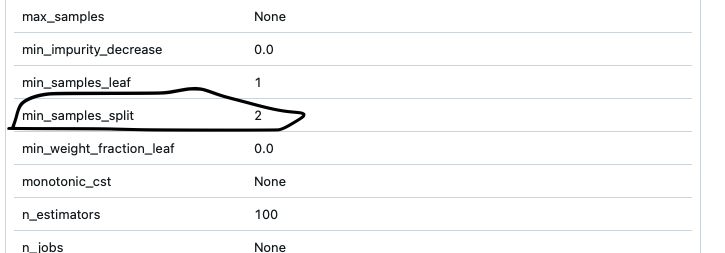

### Q4. Launch the tracking server locally

Now we want to manage the entire lifecycle of our ML model. In this step, you'll need to launch a tracking server. This way we will also have access to the model registry.

Your task is to:

- launch the tracking server on your local machine,
- select a SQLite db for the backend store and a folder called `artifacts` for the artifacts store.

You should keep the tracking server running to work on the next two exercises that use the server.

In addition to backend-store-uri, what else do you need to pass to properly configure the server?

- `default-artifact-root`
- `serve-artifacts`
- `artifacts-only`
- `artifacts-destination`

`mlflow ui --backend-store-uri sqlite:///mlflow.db --default-artifact-root ./mlruns`

## Q5. Tune model hyperparameters

Now let's try to reduce the validation error by tuning the hyperparameters of the `RandomForestRegressor` using `hyperopt`. We have prepared the script `hpo.py` for this exercise.

Your task is to modify the script `hpo.py` and make sure that the validation RMSE is logged to the tracking server for each run of the hyperparameter optimization (you will need to add a few lines of code to the `objective` function) and run the script without passing any parameters.

After that, open UI and explore the runs from the experiment called `random-forest-hyperopt` to answer the question below.

Note: Don't use autologging for this exercise.

The idea is to just log the information that you need to answer the question below, including:

- the list of hyperparameters that are passed to the `objective` function during the optimization,
- the RMSE obtained on the validation set (February 2023 data).

What's the best validation RMSE that you got?

In [6]:
!ls -lrt

total 24
-rw-r--r--  1 gbemidebe  staff  2509 May 30 21:20 preprocess_data.py
-rw-r--r--  1 gbemidebe  staff  7127 May 30 21:48 homework-3.ipynb
drwxr-xr-x  5 gbemidebe  staff   160 May 30 22:09 data
drwxr-xr-x  6 gbemidebe  staff   192 May 30 22:09 output
drwxr-xr-x  5 gbemidebe  staff   160 May 30 22:11 Q3
drwxr-xr-x  3 gbemidebe  staff    96 May 30 22:33 Q5


In [8]:
os.chdir('./Q5') # change directory to Q5
!python hpo.py --data_path ../output
os.chdir('../') # change directory to root

2024/05/30 22:34:39 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2024/05/30 22:34:39 INFO mlflow.store.db.utils: Updating database tables
INFO  [alembic.runtime.migration] Context impl SQLiteImpl.
INFO  [alembic.runtime.migration] Will assume non-transactional DDL.
INFO  [alembic.runtime.migration] Running upgrade  -> 451aebb31d03, add metric step
INFO  [alembic.runtime.migration] Running upgrade 451aebb31d03 -> 90e64c465722, migrate user column to tags
INFO  [alembic.runtime.migration] Running upgrade 90e64c465722 -> 181f10493468, allow nulls for metric values
INFO  [alembic.runtime.migration] Running upgrade 181f10493468 -> df50e92ffc5e, Add Experiment Tags Table
INFO  [alembic.runtime.migration] Running upgrade df50e92ffc5e -> 7ac759974ad8, Update run tags with larger limit
INFO  [alembic.runtime.migration] Running upgrade 7ac759974ad8 -> 89d4b8295536, create latest metrics table
INFO  [89d4b8295536_create_latest_metrics_table_py] Migration complete!
INFO  

## Q6. Promote the best model to the model registry

The results from the hyperparameter optimization are quite good. So, we can assume that we are ready to test some of these models in production. In this exercise, you'll promote the best model to the model registry. We have prepared a script called `register_model.py`, which will check the results from the previous step and select the top 5 runs. After that, it will calculate the RMSE of those models on the test set (March 2023 data) and save the results to a new experiment called `random-forest-best-models`.

Your task is to update the script `register_model.py` so that it selects the model with the lowest RMSE on the test set and registers it to the model registry.

Tip 1: you can use the method `search_runs` from the `MlflowClient` to get the model with the lowest RMSE,

Tip 2: to register the model you can use the method `mlflow.register_model` and you will need to pass the right `model_uri` in the form of a string that looks like this: `"runs:/<RUN_ID>/model"`, and the name of the model (make sure to choose a good one!).

What is the test RMSE of the best model?

In [9]:
os.chdir('./Q6') # change directory to Q6
!rm -r ./ml* 
!cp -r ../Q5/ml* . 
!python register_model.py --data_path ../output
os.chdir('../') # change directory to root

rm: ./ml*: No such file or directory
2024/05/30 23:46:14 INFO mlflow.tracking.fluent: Experiment with name 'random-forest-best-models' does not exist. Creating a new experiment.
2024/05/30 23:46:15 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'numpy.ndarray' object has no attribute 'toarray'
2024/05/30 23:46:18 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/gbemidebe/.local/lib/python3.9/site-packages/_distutils_hack/__init__.py:26: UserWarning: Setuptools is replacing distutils."
2024/05/30 23:46:21 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'numpy.ndarray' object has no attribute 'toarray'
2024/05/30 23:46:30 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'numpy.ndarray' object has no attribute 'toarray'
2024/05/30 23:46:36 WARNING mlflow.sklearn: Failed to log training dataset information to M

check the registered model by running `mlflow ui --backend-store-uri sqlite:///mlflow.db` 